In [1]:
!pip install tensorflow

All the necessary modules are been imported.


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import tensorflow as tf

from keras import models, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import imdb


from keras.datasets import imdb

Downloading the IMDB Dataset

In [3]:
(training_data, training_labels), (testing_data, testing_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Vectorization of the Data

In [4]:
def vectorizingSeq(seq, dimension=10000):
    res = np.zeros((len(seq), dimension))
    for i, seqS in enumerate(seq):
        res[i, seqS] = 1.0
    return res


Model Building  with 2 hidden layers, 16 hidden units, and RELU activation

In [5]:
Xtrain = vectorizingSeq(training_data)
Xtest = vectorizingSeq(testing_data)

In [6]:
Ytrain = np.asarray(training_labels).astype('float32')
Ytest = np.asarray(testing_labels).astype('float32')
print("Ytrain ", Ytrain.shape)
print("Ytest ", Ytest.shape)

Xval = Xtrain[:10000]
partial_Xtrain = Xtrain[10000:]
Yval = Ytrain[:10000]
partial_Ytrain = Ytrain[10000:]

Ytrain  (25000,)
Ytest  (25000,)


In [7]:
Xval = Xtrain[:10000]
partial_Xtrain = Xtrain[10000:]
Yval = Ytrain[:10000]
partial_Ytrain = Ytrain[10000:]

Model Building with two hidden layers, 16 hidden units, and the relu activation





In [8]:
mod_layer = models.Sequential()
mod_layer.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mod_layer.add(layers.Dense(16, activation='relu'))
mod_layer.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model compilation using the binary cross entropy loss function and the rnsprob optimizer

In [9]:
mod_layer.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

hist_mod_layer = mod_layer.fit(partial_Xtrain, partial_Ytrain, epochs=20, batch_size=512, validation_data=(Xval, Yval))

res_mod_layer = mod_layer.evaluate(Xtest, Ytest)
print("_" * 100)
print("Test Loss and Accuracy")
print("res_mod_layer ", res_mod_layer)
hist_data = hist_mod_layer.history
hist_data.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.5450 - loss: 0.6658 - val_accuracy: 0.7761 - val_loss: 0.5366
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8357 - loss: 0.4952 - val_accuracy: 0.8310 - val_loss: 0.4355
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9001 - loss: 0.3684 - val_accuracy: 0.8870 - val_loss: 0.3422
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9257 - loss: 0.2694 - val_accuracy: 0.8840 - val_loss: 0.3082
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9374 - loss: 0.2131 - val_accuracy: 0.8882 - val_loss: 0.2836
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.9531 - loss: 0.1737 - val_accuracy: 0.8869 - val_loss: 0.2807
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9606 - loss: 0.1407 - val_accuracy: 0.8804 - val_loss: 0.2966
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9687 - loss: 0.1171 - val_accuracy: 0.8848 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plot of the Training and Vaildation Accuracy





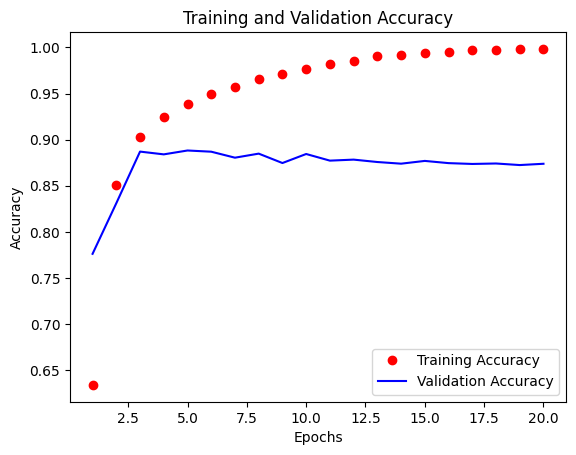

In [10]:
pl.clf()
accuracy_values = hist_data['accuracy']
val_accuracy_values = hist_data['val_accuracy']
epochs_range = range(1, (len(hist_data['accuracy']) + 1))
pl.plot(epochs_range, accuracy_values, 'ro', label='Training Accuracy')
pl.plot(epochs_range, val_accuracy_values, 'b', label='Validation Accuracy')
pl.title('Training and Validation Accuracy')
pl.xlabel('Epochs')
pl.ylabel('Accuracy')
pl.legend()
pl.show()

Plot of the Training and Validation Loss

Text(0, 0.5, 'Loss')

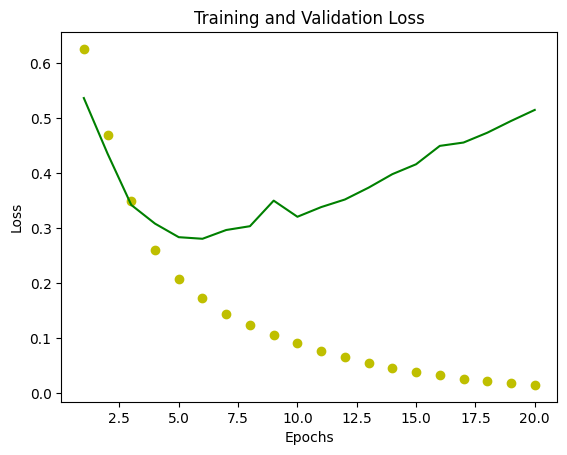

In [11]:
pl.clf()
hist_data = hist_mod_layer.history
valueatLoss = hist_data['loss']
val_valueatLoss  = hist_data['val_loss']
epochs_range = range(1, (len(hist_data['loss']) + 1))
pl.plot(epochs_range, valueatLoss , 'yo', label='Training Loss')
pl.plot(epochs_range, val_valueatLoss, 'g', label='Validation Loss')
pl.title('Training and Validation Loss')
pl.xlabel('Epochs')
pl.ylabel('Loss')

1.Model Building with one hidden layer with 16 hidden units and relu activation

In [12]:
mod_layer_1 = models.Sequential()
mod_layer_1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mod_layer_1.add(layers.Dense(1, activation='sigmoid'))
mod_layer_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_1 = mod_layer_1.fit(partial_Xtrain, partial_Ytrain, epochs=20, batch_size=512, validation_data=(Xval, Yval))

results_1 = mod_layer_1.evaluate(Xtest, Ytest)
print("_" * 100)
print("Test Loss and Accuracy")
print("results_1 ", results_1)
hist_dict_1 = history_1.history
hist_keys_1 = hist_dict_1.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - acc: 0.7036 - loss: 0.5789 - val_acc: 0.8732 - val_loss: 0.3826
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.8996 - loss: 0.3309 - val_acc: 0.8840 - val_loss: 0.3175
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9228 - loss: 0.2530 - val_acc: 0.8854 - val_loss: 0.2971
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9327 - loss: 0.2165 - val_acc: 0.8900 - val_loss: 0.2790
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9433 - loss: 0.1831 - val_acc: 0.8886 - val_loss: 0.2755
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - acc: 0.9482 - loss: 0.1644 - val_acc: 0.8789 - val_loss: 0.2985
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - acc: 0.9569 - loss: 0.1488 - val_acc: 0.8849 - val_loss: 0.2882
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - acc: 0.9619 - loss: 0.1307 - val_acc: 0.8871 - val_loss: 0.2816
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.966

Model Building with three hidden layer with 16 hidden units and relu activation

In [28]:
mod_layer_2 = models.Sequential()
mod_layer_2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mod_layer_2.add(layers.Dense(16, activation='relu'))
mod_layer_2.add(layers.Dense(16, activation='relu'))
mod_layer_2.add(layers.Dense(1, activation='sigmoid'))
mod_layer_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_2 = mod_layer_2.fit(partial_Xtrain, partial_Ytrain, epochs=20, batch_size=512, validation_data=(Xval, Yval))

results_2 = mod_layer_2.evaluate(Xtest, Ytest)
print("_" * 100)
print("Test Loss and Accuracy")
print("results_2 ", results_2)
hist_dict_2 = history_2.history
hist_keys_2 = hist_dict_2.keys()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - acc: 0.6167 - loss: 0.6433 - val_acc: 0.8624 - val_loss: 0.4589
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.8794 - loss: 0.3973 - val_acc: 0.8838 - val_loss: 0.3256
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9160 - loss: 0.2638 - val_acc: 0.8764 - val_loss: 0.3101
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.9333 - loss: 0.2060 - val_acc: 0.8850 - val_loss: 0.2881
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9479 - loss: 0.1591 - val_acc: 0.8809 - val_loss: 0.3003
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9632 - loss: 0.1291 - val_acc: 0.8773 - val_loss: 0.3152
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - acc: 0.9662 - loss: 0.1137 - val_acc: 0.8831 - val_loss: 0.3143
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - acc: 0.9745 - loss: 0.0890 - val_acc: 0.8719 - val_loss: 0.3588
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9810

2.Now with 32 hidden units and one hidden layer.

In [14]:
mod_layer_3 = models.Sequential()
mod_layer_3.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
mod_layer_3.add(layers.Dense(1, activation='sigmoid'))
mod_layer_3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

hist_3 = mod_layer_3.fit(partial_Xtrain, partial_Ytrain, epochs=20, batch_size=512, validation_data=(Xval, Yval))

res_3 = mod_layer_3.evaluate(Xtest, Ytest)
print("_" * 100)
print("Test Loss and Accuracy")
print("res_3 ", res_3)
hist_dict_3 = hist_3.history
hist_keys_3 = hist_dict_3.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - acc: 0.6913 - loss: 0.5788 - val_acc: 0.8664 - val_loss: 0.3805
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - acc: 0.8964 - loss: 0.3316 - val_acc: 0.8729 - val_loss: 0.3241
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - acc: 0.9196 - loss: 0.2529 - val_acc: 0.8849 - val_loss: 0.2889
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - acc: 0.9322 - loss: 0.2100 - val_acc: 0.8879 - val_loss: 0.2784
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - acc: 0.9438 - loss: 0.1804 - val_acc: 0.8860 - val_loss: 0.2806
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - acc: 0.9487 - loss: 0.1613 - val_acc: 0.8822 - val_loss: 0.2885
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - acc: 0.9575 - loss: 0.1434 - val_acc: 0.8837 - val_loss: 0.2865
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - acc: 0.9641 - loss: 0.1280 - val_acc: 0.8844 - val_loss: 0.2857
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - acc: 0.9671

Now with 64 units and one hidden layer

In [15]:
mod_layer_4 = models.Sequential()
mod_layer_4.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
mod_layer_4.add(layers.Dense(1, activation='sigmoid'))
mod_layer_4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

hist_4 = mod_layer_4.fit(partial_Xtrain, partial_Ytrain, epochs=20, batch_size=512, validation_data=(Xval, Yval))

results_4 = mod_layer_4.evaluate(Xtest, Ytest)
print("_" * 100)
print("Test Loss and Accuracy")
print("results_4 ", results_4)
hist_dict_4 = hist_4.history
hist_keys_4 = hist_dict_4.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - acc: 0.6763 - loss: 0.5714 - val_acc: 0.8556 - val_loss: 0.3800
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - acc: 0.8919 - loss: 0.3141 - val_acc: 0.8830 - val_loss: 0.3021
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - acc: 0.9188 - loss: 0.2427 - val_acc: 0.8824 - val_loss: 0.2936
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - acc: 0.9280 - loss: 0.2052 - val_acc: 0.8888 - val_loss: 0.2772
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - acc: 0.9461 - loss: 0.1714 - val_acc: 0.8868 - val_loss: 0.2835
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - acc: 0.9510 - loss: 0.1564 - val_acc: 0.8766 - val_loss: 0.3034
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - acc: 0.9569 - loss: 0.1392 - val_acc: 0.8701 - val_loss: 0.3404
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - acc: 0.9573 - loss: 0.1313 - val_acc: 0.8826 - val_loss: 0.2956
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - acc: 0.967

3.Using the MSE Loss function

In [33]:
mod_layer_5 = models.Sequential()
mod_layer_5.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mod_layer_5.add(layers.Dense(1, activation='sigmoid'))
mod_layer_5.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])

hist_5 = mod_layer_5.fit(partial_Xtrain, partial_Ytrain, epochs=20, batch_size=512, validation_data=(Xval, Yval))

res_5_units = mod_layer_5.evaluate(Xtest, Ytest)
print("_" * 100)
print("Test Loss and Accuracy")
print("res_5_units ", res_5_units)
hist_dict_5 = hist_5.history
hist_dict_5.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - acc: 0.6994 - loss: 0.2038 - val_acc: 0.8637 - val_loss: 0.1261
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - acc: 0.8820 - loss: 0.1117 - val_acc: 0.8771 - val_loss: 0.1047
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - acc: 0.9048 - loss: 0.0869 - val_acc: 0.8873 - val_loss: 0.0931
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9258 - loss: 0.0712 - val_acc: 0.8896 - val_loss: 0.0885
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9359 - loss: 0.0617 - val_acc: 0.8892 - val_loss: 0.0858
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9436 - loss: 0.0556 - val_acc: 0.8883 - val_loss: 0.0845
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9513 - loss: 0.0498 - val_acc: 0.8876 - val_loss: 0.0850
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9568 - loss: 0.0442 - val_acc: 0.8842 - val_loss: 0.0837
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9610

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

4.Using the tanh activation

In [36]:
mod_layer_6 = models.Sequential()
mod_layer_6.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
mod_layer_6.add(layers.Dense(1, activation='sigmoid'))
mod_layer_6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

hist_6 = mod_layer_6.fit(partial_Xtrain, partial_Ytrain, epochs=20, batch_size=512, validation_data=(Xval, Yval))

res_6_units = mod_layer_6.evaluate(Xtest, Ytest)
print("_" * 100)
print("Test Loss and Accuracy")
print("res_6_units ", res_6_units)
hist_dict_6 = hist_6.history
hist_dict_6.keys()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - acc: 0.6962 - loss: 0.5867 - val_acc: 0.8566 - val_loss: 0.4162
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - acc: 0.8887 - loss: 0.3637 - val_acc: 0.8736 - val_loss: 0.3400
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.9162 - loss: 0.2780 - val_acc: 0.8864 - val_loss: 0.3009
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - acc: 0.9326 - loss: 0.2280 - val_acc: 0.8839 - val_loss: 0.2928
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - acc: 0.9393 - loss: 0.2000 - val_acc: 0.8889 - val_loss: 0.2746
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - acc: 0.9489 - loss: 0.1734 - val_acc: 0.8892 - val_loss: 0.2731
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - acc: 0.9539 - loss: 0.1548 - val_acc: 0.8876 - val_loss: 0.2726
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - acc: 0.9584 - loss: 0.1423 - val_acc: 0.8865 - val_loss: 0.2768
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.96

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

5.Using drop out for three hidden layers with 64 units, MSE loss function and RELU

In [35]:
mod_layer_7 = models.Sequential()
mod_layer_7.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mod_layer_7.add(layers.Dropout(0.5))
mod_layer_7.add(layers.Dense(16, activation='relu'))
mod_layer_7.add(layers.Dropout(0.5))
mod_layer_7.add(layers.Dense(16, activation='relu'))
mod_layer_7.add(layers.Dropout(0.5))
mod_layer_7.add(layers.Dense(1, activation='sigmoid'))
mod_layer_7.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])

hist_7 = mod_layer_7.fit(partial_Xtrain, partial_Ytrain, epochs=20, batch_size=512, validation_data=(Xval, Yval))

res_7_units = mod_layer_7.evaluate(Xtest, Ytest)
print("_" * 100)
print("Test Loss and Accuracy")
print("res_7_units ", res_7_units)
hist_dict_7 = hist_7.history
hist_dict_7.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - acc: 0.5186 - loss: 0.2493 - val_acc: 0.6613 - val_loss: 0.2330
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.5917 - loss: 0.2312 - val_acc: 0.8394 - val_loss: 0.1753
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.6930 - loss: 0.1970 - val_acc: 0.8556 - val_loss: 0.1365
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.7530 - loss: 0.1681 - val_acc: 0.8665 - val_loss: 0.1114
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.7997 - loss: 0.1487 - val_acc: 0.8824 - val_loss: 0.0941
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.8408 - loss: 0.1245 - val_acc: 0.8762 - val_loss: 0.0933
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.8557 - loss: 0.1131 - val_acc: 0.8780 - val_loss: 0.0902
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - acc: 0.8817 - loss: 0.0976 - val_acc: 0.8841 - val_loss: 0.0849
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.8895

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

one layer with drop out of 0.5

In [19]:
mod_layer_8 = models.Sequential()
mod_layer_8.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mod_layer_8.add(layers.Dropout(0.5))
mod_layer_8.add(layers.Dense(1, activation='sigmoid'))
mod_layer_8.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

hist_8 = mod_layer_8.fit(partial_Xtrain, partial_Ytrain, epochs=20, batch_size=512, validation_data=(Xval, Yval))

res_8_units = mod_layer_8.evaluate(Xtest, Ytest)
print("_" * 100)
print("Test Loss and Accuracy")
print("res_8_units ", res_8_units)
hist_dict_8 = hist_8.history
hist_dict_8.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - acc: 0.6568 - loss: 0.6229 - val_acc: 0.8561 - val_loss: 0.4504
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.8430 - loss: 0.4356 - val_acc: 0.8745 - val_loss: 0.3706
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.8780 - loss: 0.3561 - val_acc: 0.8846 - val_loss: 0.3266
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.8920 - loss: 0.3068 - val_acc: 0.8788 - val_loss: 0.3121
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9096 - loss: 0.2745 - val_acc: 0.8913 - val_loss: 0.2867
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc: 0.9162 - loss: 0.2464 - val_acc: 0.8910 - val_loss: 0.2787
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc: 0.9239 - loss: 0.2290 - val_acc: 0.8891 - val_loss: 0.2743
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.9336 - loss: 0.2074 - val_acc: 0.8865 - val_loss: 0.2736
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.9344

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

Using  the L1 regulariser

In [30]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers,models

mod_layer_9 = models.Sequential()
mod_layer_9.add(layers.Dense(64, activation='relu', activity_regularizer=regularizers.L1(0.01), input_shape=(10000,)))
mod_layer_9.add(layers.Dense(1, activation='sigmoid'))
mod_layer_9.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

hist_9 = mod_layer_9.fit(partial_Xtrain, partial_Ytrain, epochs=20, batch_size=512, validation_data=(Xval, Yval))

res_9_units = mod_layer_9.evaluate(Xtest, Ytest)
print("_" * 100)
print("Test Loss and Accuracy")
print("res_9_units ", res_9_units)
hist_dict_9 = hist_9.history
hist_dict_9.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - acc: 0.4954 - loss: 3.2740 - val_acc: 0.4958 - val_loss: 0.7110
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - acc: 0.5038 - loss: 0.6984 - val_acc: 0.4965 - val_loss: 0.7012
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc: 0.5009 - loss: 0.6938 - val_acc: 0.4958 - val_loss: 0.6995
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - acc: 0.5086 - loss: 0.6931 - val_acc: 0.4953 - val_loss: 0.6990
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - acc: 0.4989 - loss: 0.6932 - val_acc: 0.4951 - val_loss: 0.6990
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - acc: 0.5010 - loss: 0.6932 - val_acc: 0.4952 - val_loss: 0.6990
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - acc: 0.5059 - loss: 0.6931 - val_acc: 0.4953 - val_loss: 0.6990
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - acc: 0.5093 - loss: 0.6931 - val_acc: 0.4959 - val_loss: 0.6990
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - acc: 0.512

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

Using the L2 regulariser

In [31]:
mod_layer_10 = models.Sequential()
mod_layer_10.add(layers.Dense(64, activation='relu', activity_regularizer=regularizers.L2(0.01), input_shape=(10000,)))
mod_layer_10.add(layers.Dense(1, activation='sigmoid'))
mod_layer_10.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

hist_10 = mod_layer_10.fit(partial_Xtrain, partial_Ytrain, epochs=20, batch_size=512, validation_data=(Xval, Yval))

res_10_units = mod_layer_10.evaluate(Xtest, Ytest)
print("_" * 100)
print("Test Loss and Accuracy")
print("res_10_units ", res_10_units)
hist_dict_10 = hist_10.history
hist_dict_10.keys()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - acc: 0.5066 - loss: 1.2568 - val_acc: 0.5029 - val_loss: 0.6975
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - acc: 0.5141 - loss: 0.6944 - val_acc: 0.4977 - val_loss: 0.6951
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - acc: 0.5126 - loss: 0.6932 - val_acc: 0.4975 - val_loss: 0.6946
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - acc: 0.5005 - loss: 0.6932 - val_acc: 0.4950 - val_loss: 0.6945
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - acc: 0.5069 - loss: 0.6931 - val_acc: 0.4965 - val_loss: 0.6944
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - acc: 0.4979 - loss: 0.6932 - val_acc: 0.4963 - val_loss: 0.6942
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - acc: 0.5088 - loss: 0.6931 - val_acc: 0.4957 - val_loss: 0.6941
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - acc: 0.5056 - loss: 0.6931 - val_acc: 0.4959 - val_loss: 0.6940
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - acc: 0.507

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

Using adam optimizer inplace of rmsprop

In [32]:
mod_layer_11 = models.Sequential()
mod_layer_11.add(layers.Dense(64, activation='relu', activity_regularizer=regularizers.L1(0.01), input_shape=(10000,)))
mod_layer_11.add(layers.Dense(1, activation='sigmoid'))
mod_layer_11.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

hist_11 = mod_layer_11.fit(partial_Xtrain, partial_Ytrain, epochs=20, batch_size=512, validation_data=(Xval, Yval))

res_11_units = mod_layer_11.evaluate(Xtest, Ytest)
print("_" * 100)
print("Test Loss and Accuracy")
print("res_11_units ", res_11_units)
hist_dict_11 = hist_11.history
hist_dict_11.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - acc: 0.5063 - loss: 3.7010 - val_acc: 0.4959 - val_loss: 0.7167
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - acc: 0.5044 - loss: 0.7000 - val_acc: 0.4947 - val_loss: 0.7029
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - acc: 0.5068 - loss: 0.6937 - val_acc: 0.4948 - val_loss: 0.7007
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - acc: 0.4983 - loss: 0.6932 - val_acc: 0.4941 - val_loss: 0.7005
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.5019 - loss: 0.6931 - val_acc: 0.4941 - val_loss: 0.7005
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - acc: 0.5054 - loss: 0.6931 - val_acc: 0.4942 - val_loss: 0.7005
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - acc: 0.5078 - loss: 0.6931 - val_acc: 0.4942 - val_loss: 0.7005
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc: 0.4994 - loss: 0.6932 - val_acc: 0.4942 - val_loss: 0.7006
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - acc: 0.502

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])